<p><img src="https://assets.datacamp.com/production/project_1237/img/netflix.jpg" alt="Someone's feet on table facing a television"></p>

## Netflix Data Analysis

<p>Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by market capitalization, boasting over 200 million subscribers as of January 2021.</p>
<p>Given the large number of movies and series available on the platform i decided to take a dive into their publicly available data and try to answer some questions that pop up in my mind.</p>
<p>First lets start with loading and inspecting our dataset</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_df = pd.read_csv("netflix_data.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [3]:
netflix_df = netflix_df.rename(columns={"show_id" : "netflix_id"})
netflix_df.head()

,netflix_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [4]:
netflix_df.shape

(7787, 11)

In [5]:
netflix_ids = []
for i in range(1,len(netflix_df)+1):
    net_id = "NFLX" + str(i).zfill(4)
    netflix_ids.append(net_id)

netflix_df["netflix_id"] = netflix_ids
netflix_df.set_index("netflix_id",inplace = True)
netflix_df

,type,title,director,cast,country,date_added,release_year,duration,description,genre
netflix_id,,,,,,,,,,
NFLX0001,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
NFLX0002,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
NFLX0003,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
NFLX0004,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
NFLX0005,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...
NFLX7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
NFLX7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
NFLX7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries


The first thing that sticks out to me is the <code>duration</code> column. We can see that the duration represents different values depending on whether the row is a <code>Movie</code> or a <code>TV Show</code> (perhaps the number of minutes versus the number of seasons).
For now i will make some visualizations to compare Movies with TV Show but later i will probably continue only with Movie type Analysis.

### Movies vs TV Shows

In [6]:
type_count = netflix_df["type"].value_counts()
type_count

type
Movie      5377
TV Show    2410
Name: count, dtype: int64

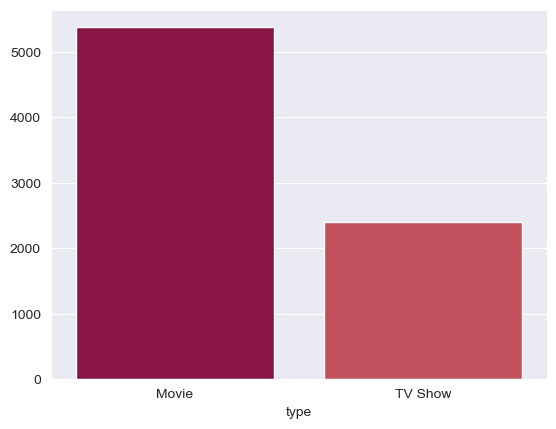

In [7]:
sns.set_style("darkgrid")
colors = ["#9e0142","#d53e4f"]

sns.barplot(x=type_count.index, y=type_count.values, palette = colors)
plt.xlabel = "Type"
plt.ylabel = "Count"
plt.show()

### Countries

<i>What are the Top 10 most frequent Countries that Netflix Movies and TV Shows come from ?</i>

In [27]:
country_count = netflix_df["country"].value_counts()
country_count

country
United States     2883
India              956
United Kingdom     577
Canada             259
Japan              237
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: count, Length: 81, dtype: int64

In [28]:
netflix_df["country"].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland', 'Thailand', 'Nigeria', nan, 'Norway',
       'United Kingdom', 'Japan', 'South Korea', 'Italy', 'Canada',
       'Indonesia', 'Romania', 'Spain', 'Iceland', 'South Africa',
       'France', 'Portugal', 'Hong Kong', 'Argentina', 'Germany',
       'Denmark', 'Kenya', 'New Zealand', 'Pakistan', 'Australia',
       'China', 'Taiwan', 'Netherlands', 'Philippines', 'United Arab',
       'Iran', 'Israel', 'Uruguay', 'Bulgaria', 'Mauritius', 'Lebanon',
       'Colombia', 'Soviet Union', 'Sweden', 'Malaysia', 'Ireland',
       'Serbia', 'Finland', 'Peru', 'Chile', 'Ghana', 'Saudi Arabia',
       'Namibia', 'Russia', 'Belgium', 'Vietnam', 'Kuwait',
       'Czech Republic', 'Zimbabwe', 'Hungary', 'Venezuela', 'Cambodia',
       'Austria', 'West Germany', 'Slovenia', 'Switzerland', 'Jordan',
       'Bangladesh', 'Georgia', 'Puerto Rico', 'Senegal', 'Guatemala',
       'Ukraine', 'Jamaica', 'Belaru

In [30]:
movie_df = netflix_df[netflix_df["type"]=="Movie"]
movie_df.head()

,type,title,director,cast,country,date_added,release_year,duration,description,genre
netflix_id,,,,,,,,,,
NFLX0002,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
NFLX0003,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
NFLX0004,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
NFLX0005,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
NFLX0007,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [31]:
movie_country_count = movie_df["country"].value_counts()
movie_country_count

country
United States     2100
India              883
United Kingdom     341
Canada             175
France             137
                  ... 
Jamaica              1
Greece               1
Paraguay             1
Somalia              1
Croatia              1
Name: count, Length: 74, dtype: int64

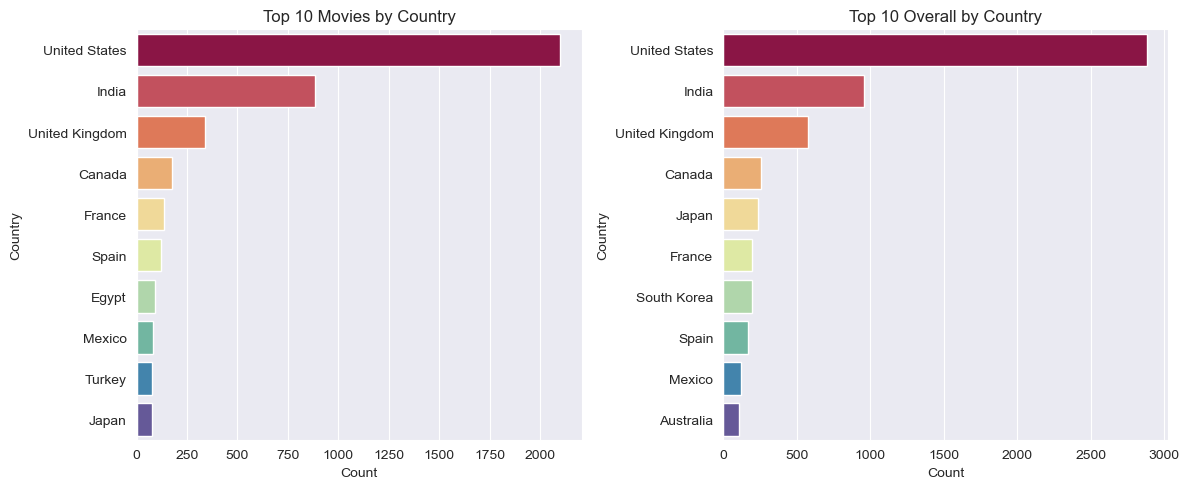

In [33]:
sns.set_style("darkgrid")
colors = ["#9e0142", "#d53e4f", "#f46d43", "#fdae61", "#fee08b", "#e6f598", "#abdda4", "#66c2a5", "#3288bd", "#5e4fa2"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #1 row, 2 columns


sns.barplot(x=movie_country_count.head(10).values, y=movie_country_count.head(10).index, palette=colors, orient='h', ax=axes[0])
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Country")
axes[0].set_title("Top 10 Movies by Country")


sns.barplot(x=country_count.head(10).values, y=country_count.head(10).index, palette=colors, orient='h', ax=axes[1])
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Country")
axes[1].set_title("Top 10 Overall by Country")


plt.tight_layout()
plt.show()

<p>Since i am an avid Anime watcher i can see that Japan is in the top 5 countries for Overall by Country but is further bellow in the Movies only Chart.<br>
This can be proof about how big the Anime Series Industry is in Japan and in the World.
The same can be said about the K-Drama industy in South Korea.</p>

From here onwards i will be analysing only the <code>Movie</code> dataframe

### Genres
<i>What are the Top most frequent Movie Genres ?</i>

In [36]:
genre_count_movies = movie_df["genre"].value_counts()
genre_count_movies

genre
Dramas                  1384
Comedies                1074
Documentaries            751
Action                   721
Children                 502
Stand-Up                 321
Horror Movies            244
International Movies     114
Classic Movies            77
Uncategorized             56
Thrillers                 49
Independent Movies        20
Anime Features            19
Music                     17
Cult Movies               12
Sci-Fi                    11
Romantic Movies            3
Sports Movies              1
LGBTQ Movies               1
Name: count, dtype: int64

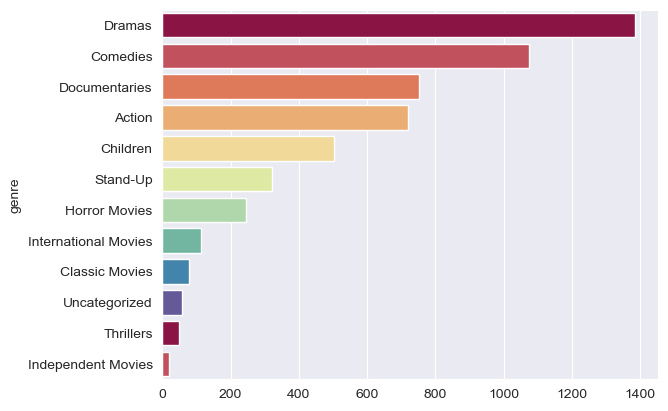

In [40]:
sns.set_style("darkgrid")
colors = ["#9e0142","#d53e4f","#f46d43","#fdae61","#fee08b","#e6f598","#abdda4", "#66c2a5", "#3288bd", "#5e4fa2"]

sns.barplot(x=genre_count_movies.head(12).values, y=genre_count_movies.head(12).index,palette = colors, orient='h')
plt.xlabel = "Genre"
plt.ylabel = "Count"
plt.show()

For further analysis i will filter out some columns that are not necessary.

In [43]:
only_movie_df = movie_df[['title', 'country', 'genre', 'release_year', 'duration']]
only_movie_df.head()

,title,country,genre,release_year,duration
netflix_id,,,,,
NFLX0002,7:19,Mexico,Dramas,2016,93
NFLX0003,23:59,Singapore,Horror Movies,2011,78
NFLX0004,9,United States,Action,2009,80
NFLX0005,21,United States,Dramas,2008,123
NFLX0007,122,Egypt,Horror Movies,2019,95


### Are Movies getting shorther through the years because our attention span may also be shorter ?

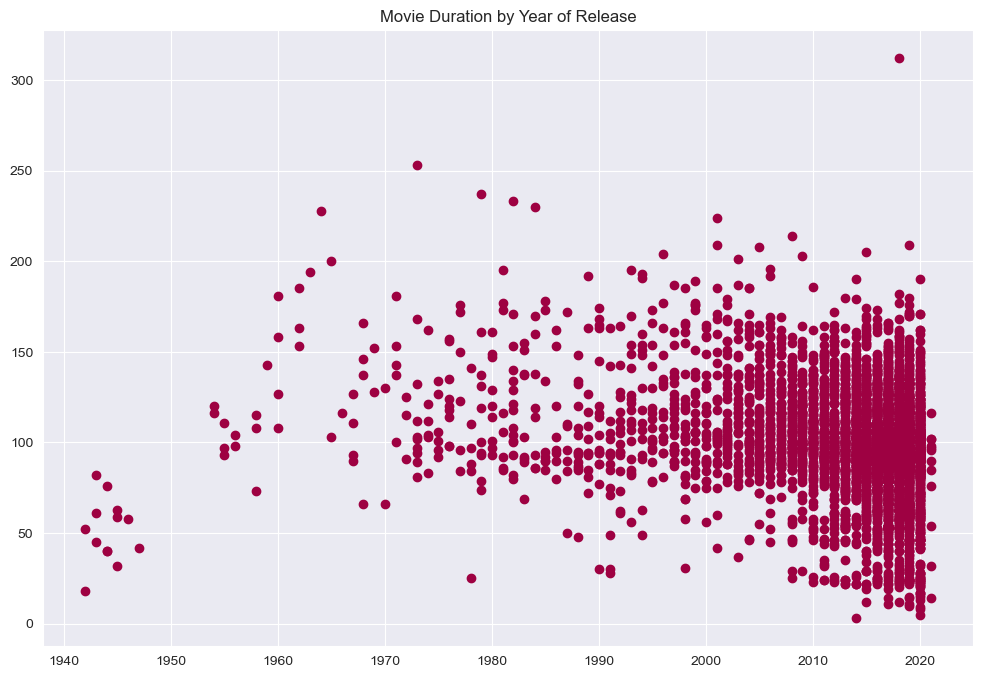

In [59]:
fig = plt.figure(figsize=(12, 8))
                 
plt.scatter(only_movie_df["release_year"], only_movie_df["duration"], c="#9e0142")
plt.title("Movie Duration by Year of Release")
plt.show()

Lets check which movies are below 60 min long

In [56]:
short_movies = only_movie_df[(only_movie_df["duration"] < 60)]
short_movies

,title,country,genre,release_year,duration
netflix_id,,,,,
NFLX0036,#Rucker50,United States,Documentaries,2016,56
NFLX0056,100 Things to do Before High School,United States,Uncategorized,2014,44
NFLX0068,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
NFLX0102,3 Seconds Divorce,Canada,Documentaries,2018,53
NFLX0147,A 3 Minute Hug,Mexico,Documentaries,2019,28
...,...,...,...,...,...
NFLX7680,WWII: Report from the Aleutians,United States,Documentaries,1943,45
NFLX7693,Ya no estoy aquí: Una conversación entre Guill...,NaN,Documentaries,2020,15
NFLX7719,Yoo Byung Jae: Discomfort Zone,South Korea,Stand-Up,2018,54


It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster.
I will plot these genres with different color instead of removing them instanteniously.

In [54]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in only_movie_df.iterrows() :
    if row['genre'] == "Children":
        colors.append("#fee08b")
    elif row['genre'] == "Documentaries":
        colors.append("#66c2a5")
    elif row['genre'] == "Stand-Up":
        colors.append("#3288bd")
    elif row["genre"] == "Uncategorized":
        colors.append("#f46d43")
    else:
        colors.append("#9e0142")

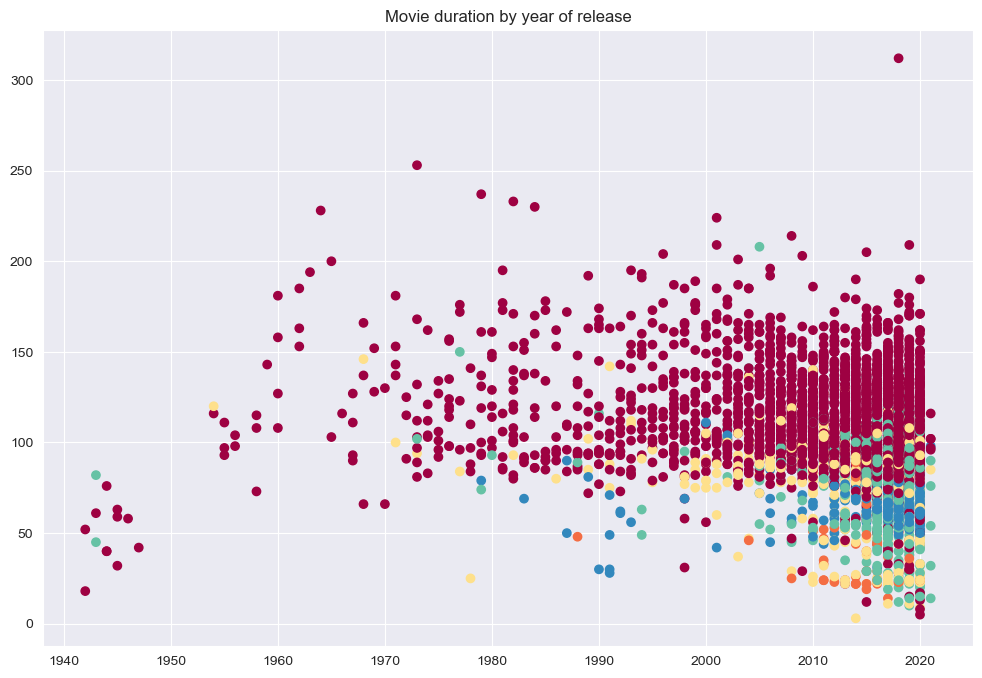

In [55]:
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(only_movie_df["release_year"], only_movie_df["duration"], c=colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")

# Show the plot
plt.show()

Non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. <br>
Further analysis needs to be done to prove this statement <i>"Movies are getting shorther through the years because our attention span may also be shorter"</i> as wrong or right.